In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


df = pd.read_csv("/content/Netflix Dataset 1 (1).csv")


print(" Dataset Preview:")
print(df.head())


print("\n Dataset Info:")
print(df.info())
print("\n Dataset Shape:", df.shape)

print("\nColumns in dataset:")
print(df.columns.tolist())




 Dataset Preview:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

             

In [6]:

print("\nMissing values before cleaning:")
print(df.isnull().sum())
df.fillna("Unknown", inplace=True)
df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
print("\nCleaned data sample:")
print(df.head())



Missing values before cleaning:
Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date     0
Rating           0
Duration         0
Type             0
Description      0
date_added      98
year_added      98
dtype: int64

Cleaned data sample:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Boswo

/tmp/ipython-input-1349761988.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)
/tmp/ipython-input-1349761988.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


/tmp/ipython-input-477039652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


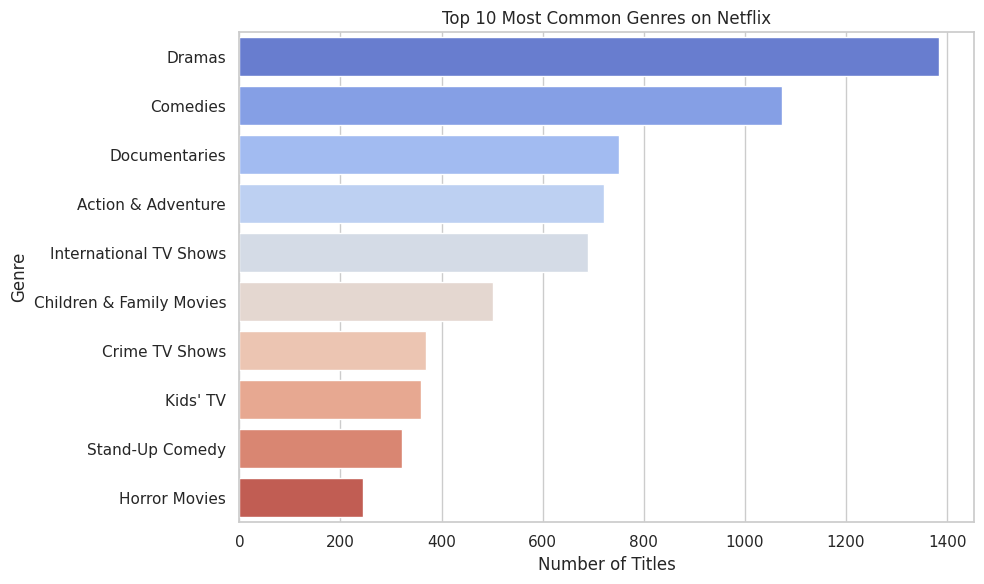

In [29]:
df['primary_genre'] = df['Type'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else "Unknown")

genre_counts = df['primary_genre'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

/tmp/ipython-input-297971671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')


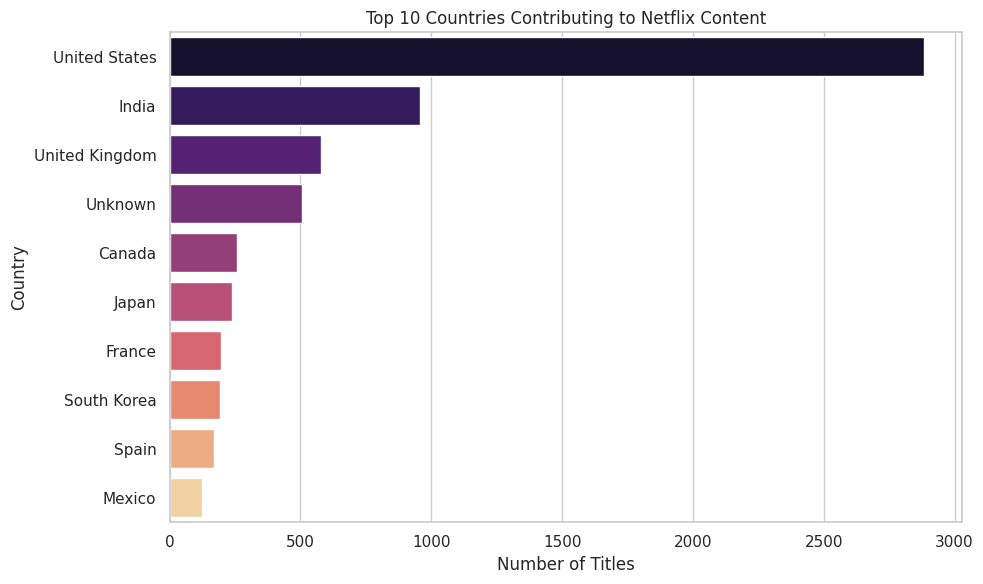

In [31]:
df['main_country'] = df['Country'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else "Unknown")


country_counts = df['main_country'].value_counts().head(10)


sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')
plt.title('Top 10 Countries Contributing to Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2122992265.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


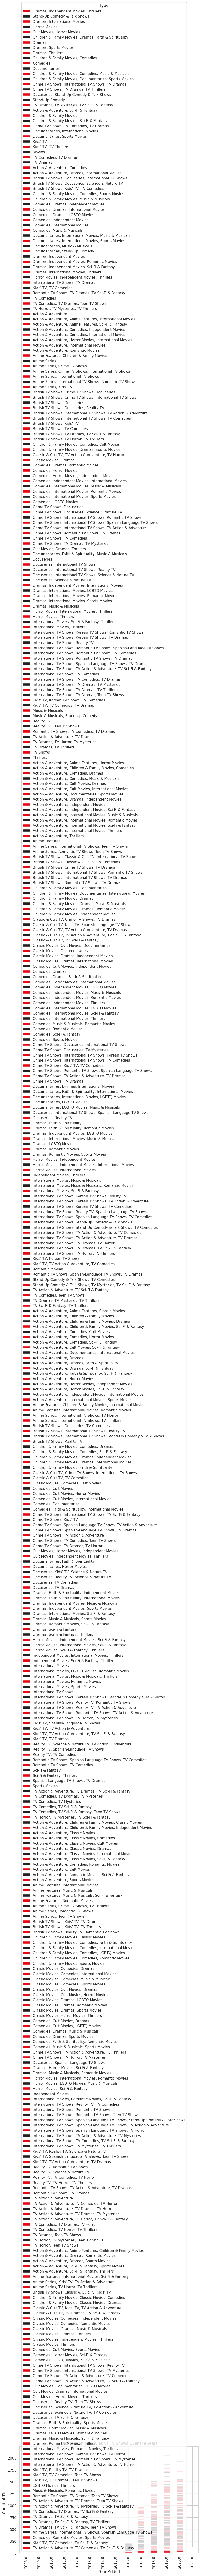

In [35]:
# -------------------------------------------
# Movies vs TV Shows Analysis
# -------------------------------------------

# Grouping by year and type
content_trend = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Plot the trends
content_trend.plot(kind='bar', stacked=True, color=['#E50914', '#221f1f'])
plt.title('Distribution of Movies vs TV Shows Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count of Titles')
plt.legend(title='Type')
plt.tight_layout()
plt.show()
